In [2]:
### Temporal Difference Learning or TD learning is another Model Free Policy Evaluation Technique

In [3]:
### It uses a combination of Monte Carlo and Dynamic Programming.

### Monte-carlo can work only in episodic setting and updates value function only after an episode

### TD learning can work in non-episodic setting also, and the value function is updated for every state in an episode

### It samples (state, rewards, next step) from the environment, and estimates the expectation of 
### discounted future rewards for a state, (G)

### G for a state is estimated as: G(t)= R(t) + gamma*V_pi(s'), where s' is the next state.
### and V_pi(s): value function of state s under policy pi

### This estimation is called Bootstrapping. 

### As in this case we sample (S,R,S') from original environment, it is said to have a monte carlo character
### and as we use previous v[s'] to estimate the return of the state at t+1, we call the approach to have
### Dynamic programming character. 

### In simpler words, instead of collecting the entire path, TD uses the value of the next state s' to create an
### estimate. As v[s'] is the expected sum of rewards that can be collected from s'(the next state according to policy 
### based action), it is said to give an approx estimate of G.

### G(t)= R(t) + gamma*V_pi(s'). so, the [r_(t+1)+gamma*r_(t+2)...] is replaced. 

### Due to the presence of the dynamic programming character, for TD learning, the process must be a markovian 
### Process. 

### Now as in this case, we use V_pi[s'] to estimate G, there is no variance, as v[s'] is the expected sum of rewards
### and is said to be the probabilistic sum of all the rewards that can be acheived from s'. So, it covers all the paths possible. 

### But as it uses an estimation there is a bias involved. 

### As in monte carlo online:  V[s]=V[s]+alpha*(G-V[s])

### In TD the equation is modified as: V[s]=V[s]+alpha*((R[s]+gamma*V[s']) - V[s])

#### Accessing Environment

In [4]:
!pip3 install pygame

     |████████████████████████████████| 11.8MB 17.0MB/s 


In [5]:
import os
os.environ['SDL_VIDEODRIVER']='dummy'
import pygame
pygame.display.set_mode((640,480))

pygame 2.0.1 (SDL 2.0.14, Python 3.7.10)
Hello from the pygame community. https://www.pygame.org/contribute.html


<Surface(640x480x32 SW)>

In [ ]:
!unzip images.zip

In [ ]:
!unzip modules.zip

In [8]:
from gridworld import GridWorld
import numpy as np

In [10]:
world=\
    """
    wwwwwwwwww
    wa       w
    w    wwwww
    wwww     w
    w        w
    w        w
    w        w
    w g  wwwww
    w        w
    wwwwwwwwww
    """

#### World Declaration
env=GridWorld(world)

env._max_epi_step=200     ## Number of maximum steps in an episode

In [11]:
import matplotlib.pyplot as plt
import cv2

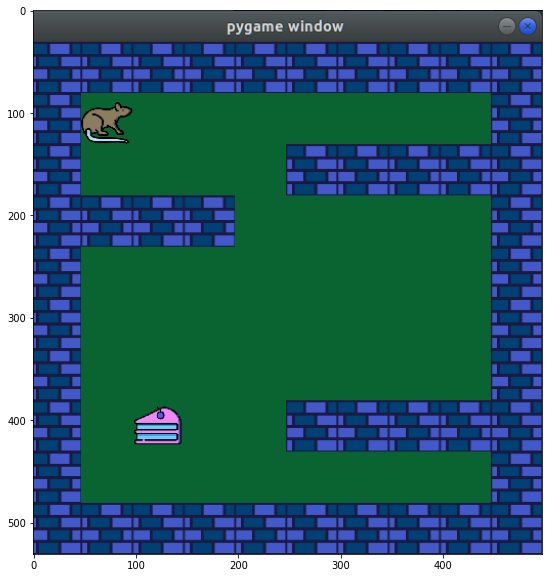

In [12]:
img=cv2.imread("env.png")
plt.figure(figsize = (10,10))
plt.imshow(img)
plt.show()

In [13]:
policy=np.random.randint(0,4,env.state_count)  ### Creating a random policy for all the states
### For evaluation 

In [14]:
policy

array([3, 2, 3, 1, 1, 3, 2, 3, 1, 0, 0, 1, 2, 0, 2, 0, 1, 3, 1, 0, 3, 1,
       0, 3, 2, 3, 0, 1, 2, 1, 3, 2, 3, 3, 2, 3, 2, 2, 1, 3, 1, 0, 2, 2,
       2, 1, 2, 1, 0, 0, 2, 1, 1])

### TD Learning

In [15]:
def generate_episodes(policy):

  episodes=[]
  curr_state=env.reset()  ### Returns a starting state.
  done=False ### Signifies if the episode is over.

  while True:
    action=policy[curr_state]  ## Choosing the action for the state according to the policy.
    next_state,reward,done,_=env.step(action)  ### Returns from environment on taking an action
    episodes.append((curr_state,reward))  ### keeping record of the path in an episode (state,reward)

    yield(curr_state,reward,next_state)  ### Throws this tuple, works like a generator

    if done== True:
      curr_state=env.reset()  ### Returns a starting state
    else:
      curr_state=next_state ### updating state

    
### As in case of TD learning episodic setting is not required, so we just need to throw the tuples to
## Update the value functions accordingly. The action is taken according to the policy.



In [19]:
def generate_value_func(policy,gamma=0.99,alpha=0.001):
  
  generator=generate_episodes(policy)  ### Creating the generator
  V=np.zeros(env.state_count) ### Value function  for the states Initialized

  for _ in range(100000):  ### We let the agent see 100000 tuples to estimate the value function
    
    s,r,s_=next(generator) ### Generating the next tuple based on the policy, to choose the action
    V[s]=V[s]+alpha*((r+gamma*V[s_])-V[s])  ### Updating Value function from the formula

    ### ALpha is the learning rate
    ### Gamma is the discount factor.
  
  return V





In [20]:
generate_value_func(policy)

array([-9.46435659e+00, -4.45716964e+00, -8.21689574e-01, -4.86120229e-01,
       -1.66649906e-01, -1.94201587e-01, -2.05119822e-02, -1.20020570e-02,
       -6.86095971e+00, -1.17428402e+00, -1.81166630e+00, -4.73228257e+00,
       -7.35635670e+00, -5.02709788e+00, -5.01039437e+00, -5.75707409e+00,
       -5.64606587e+00, -2.27935605e+00, -2.66495558e-01, -7.19451882e-01,
       -3.64142542e+00, -6.60281865e-01, -2.87143210e+00, -5.42510069e+00,
       -5.41060606e+00, -7.63056133e-01, -7.18656354e-01, -2.28849590e+00,
       -6.70378519e-01, -5.45332889e-01, -9.77428959e-01, -6.94649420e-01,
       -1.34763373e+00, -2.66360626e-01, -9.19110554e-02, -2.21618149e+00,
       -1.00940865e+00, -6.04765064e-01, -4.17405684e-01, -1.04175030e-01,
       -2.97004419e-01,  1.54594045e-01,  0.00000000e+00,  1.57591725e+00,
       -2.65558036e-02, -4.15544920e-02,  2.90181268e-03, -7.27830626e-02,
       -1.97791271e-02, -1.59692661e-01, -1.48497002e-01, -1.00877376e-01,
       -1.46859958e-01])

In [20]:
### Now as we use R + gamma* V_pi[s'] as the estimation of G for state s, there is some error involved
### as it is an estimate.

### The error is called TD Error, and given by:

## Delta(t)= R(t) + gamma* V_pi(S_(t+1)) - V_pi(S_t)

### In this case, we use alpha as a very small constant value, it causes the algorithm to converge
### slowly. The learning rate should decay proportional to 1/t. Such a learning rate, varying with
### time helps the algorithm to converge quickly.

### If alpha is set to 1, the algorithm oscillates and never converges. so, we set alpha to a very small
## Value for the algorithm to converge. 